# **Importing all the dataset required**

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# **Import Dataset**

In [7]:
# import dataset
data = pd.read_csv('/content/sample_data/drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [8]:
# Dimensions of the Dataset
data.shape

(200, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [10]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# **Use LabelEncoder encoder to transform categorical features into numerical features**

In [16]:
# Use LabelEncoder encoder to transform categorical features into numerical features
label = LabelEncoder()
data['Sex'] = label.fit_transform(data['Sex'])
data['BP'] = label.fit_transform(data['BP'])
data['Cholesterol'] = label.fit_transform(data['Cholesterol'])
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [17]:
# Split the data into tarin and test
x = data.drop('Drug',axis = 1)
y = data['Drug']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 40)

In [18]:
print(f"Shape train features :{x_train.shape}")
print(f"Shape train labels :{y_train.shape}")
print(f"Shape test features :{x_test.shape}")
print(f"Shape test labels :{y_test.shape}")


Shape train features :(160, 5)
Shape train labels :(160,)
Shape test features :(40, 5)
Shape test labels :(40,)


# **Instantiate the DecisionTreeClassifier model**

In [19]:
# Instantiate the DecisionTreeClassifier model
model = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)
model.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(x_test)


In [20]:
#Let check the accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Train accuracy
y_train_predict = model.predict(x_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

# Test accuracy
y_test_predict = model.predict(x_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y_test,y_test_predict)*100))

Accuracy: 1.0
Model accuracy for training data : 100.00%
Model accuracy for validation data : 100.00%


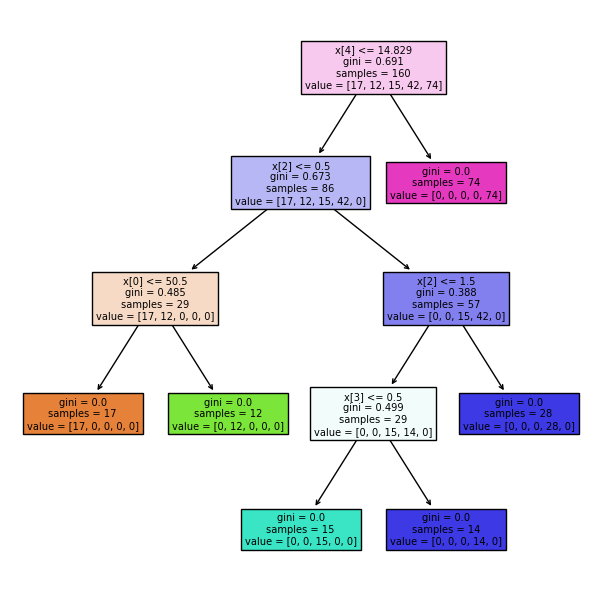

In [21]:
plt.figure(figsize=(7.5,7.5))
tree.plot_tree(model,filled=True)
plt.show()

# **Evaluating our test dataset bold text**

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print('Precision, Recall and f1-score : \n',classification_report(y_test,y_pred))
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))

Precision, Recall and f1-score : 
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         1
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix : 
 [[ 6  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 17]]


# **Printing the Confusion Matrix**

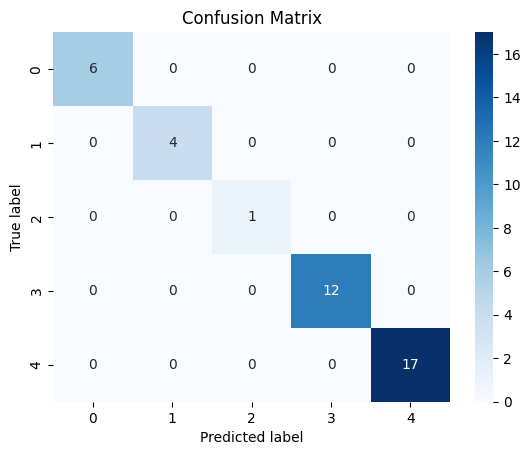

In [23]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# **Binding false positive rate and true positive rate**

In [35]:
# Convert y_test and y_pred to binary values
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)
y_pred_binary = lb.transform(y_pred)

# Calculate the ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_binary[:, 1], y_pred_binary[:, 1])

# Calculate the AUC score
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Print the results
print("FPR :", fpr_dt)
print("TPR :", tpr_dt)
print("Threshold :", thresholds_dt)

FPR : [0. 0. 1.]
TPR : [0. 1. 1.]
Threshold : [2 1 0]


# **Plotting ROC curve for our Decision Tree**

In [36]:
auc_score_dt = auc(fpr_dt,tpr_dt)
print('AUC score : ',auc_score_dt)
print('AUC score in % :{0:0.2f}%'.format(auc_score_dt*100))

AUC score :  1.0
AUC score in % :100.00%


In [37]:
def plot_roc_curve(fpr, tpr):
  plt.figure(figsize=(7.5,7.5))
  plt.plot(fpr_dt, tpr_dt, color='green', label='AUC = %0.2f' % auc_score_dt)
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()


# **Pruning of our decision tree**

In [38]:
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# ***Visualizing alpha w.r.t impurity of leaves***

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

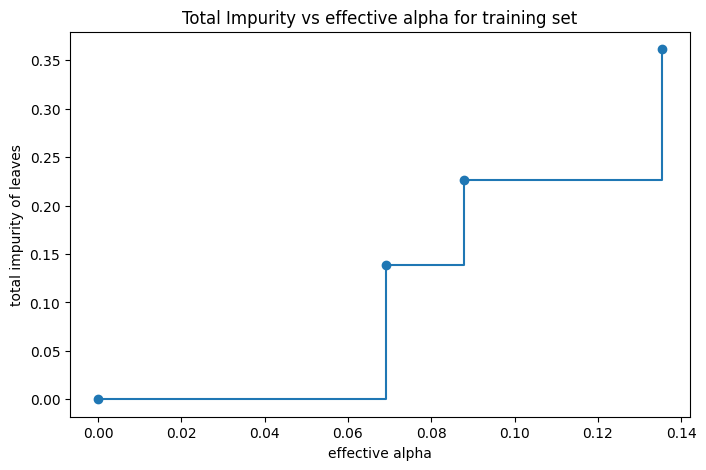

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [40]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(x_train, y_train)
  clfs.append(clf)
  print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
  clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 11 with ccp_alpha: 0.33000181686046504
Number of nodes in the last tree is: 7 with ccp_alpha: 0.33000181686046504
Number of nodes in the last tree is: 5 with ccp_alpha: 0.33000181686046504
Number of nodes in the last tree is: 3 with ccp_alpha: 0.33000181686046504
Number of nodes in the last tree is: 1 with ccp_alpha: 0.33000181686046504


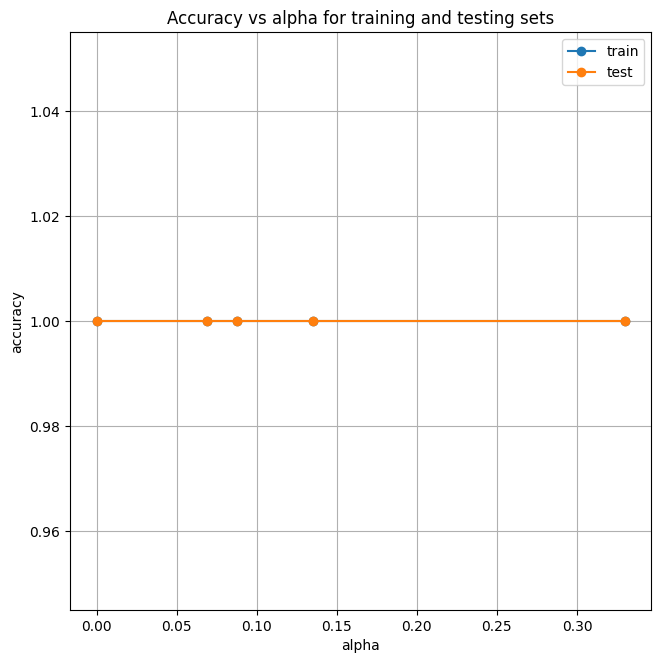

In [41]:
train_scores = [model.score(x_train, y_train) for clf in clfs]
test_scores = [model.score(x_test, y_test) for clf in clfs]
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

# **Accuracy after pruning**

In [43]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

In [44]:
pred=clf.predict(x_test)
print('Accuracy of test dataset : ',accuracy_score(y_test, pred))
pred_1 = clf.predict(x_train)
print('Accuracy of train dataset : ',accuracy_score(y_train,pred_1))

Accuracy of test dataset :  1.0
Accuracy of train dataset :  1.0


# **Visualizing after pruning**

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.691\nsamples = 160\nvalue = [17, 12, 15, 42, 74]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.673\nsamples = 86\nvalue = [17, 12, 15, 42, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.485\nsamples = 29\nvalue = [17, 12, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.388\nsamples = 57\nvalue = [0, 0, 15, 42, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.499\nsamples = 29\nvalue = [0, 0, 15, 14, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 15, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 0, 14, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 0, 28, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 74\nvalue = [0, 0, 0, 0, 74]')]

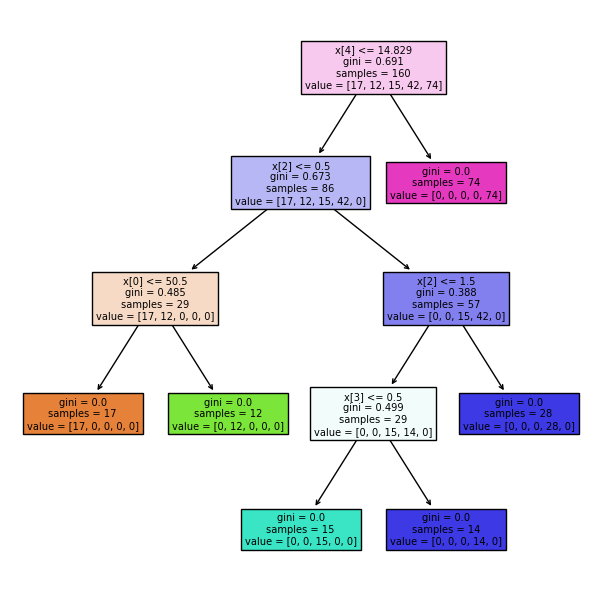

In [45]:
plt.figure(figsize=(7.5,7.5))
tree.plot_tree(clf,filled=True)

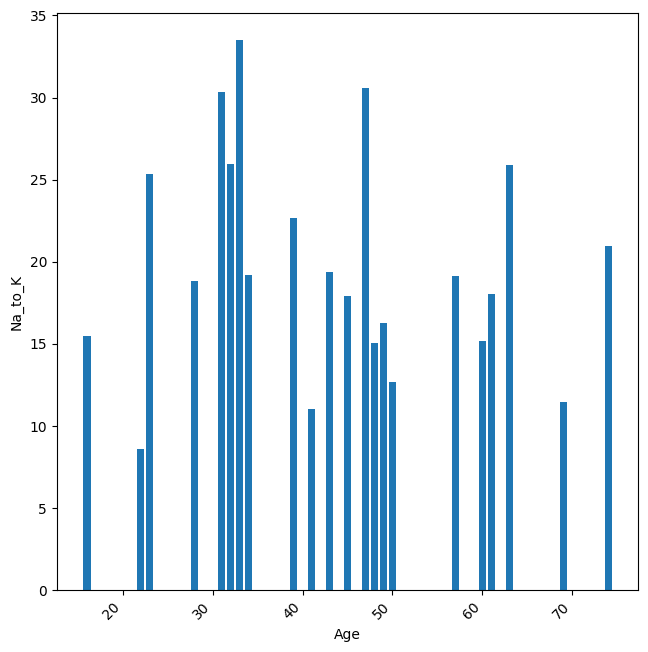

In [46]:
datatop=data.iloc[0:30]
plt.figure(figsize=(7.5,7.5))
plt.bar(datatop['Age'], datatop['Na_to_K'])
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()